# Unsupervised White Blood Cell Detection

### Motivation & Business Case
The accurate identification of white blood cell types is crucial for diagnosing various blood disorders and determining appropriate treatments. Traditional manual classification is time-consuming and can be subject to human error. Our goal was to develop an automated, unsupervised learning system that could reliably distinguish between different types of white blood cells, potentially improving both the speed and accuracy of blood analysis in clinical settings.

- In this project, our objective is to employ a data-driven approach to identify the type of white blood cell and match appropriate treatments to individual patients.
- To address this challenge, we will utilize a public blood cell dataset consisting of cell images. These images encompass various types of blood cells, such as red blood cells (RBC), white blood cells (WBC), and platelets.
- Additionally, each image is associated with an XML file that contains information about the primary category and bounding boxes for individual cells. The main labels file (labels.csv) further provides subcategories for the white blood cells (WBC) within each image.
- Our primary approach will involve employing a pre-trained neural network as foundational model, using ResNet50 pretrained on ImageNet as autoEncoder.
- It's important to note that we are prohibited from using the provided labels directly for this task (hence it is an unsupervised task).

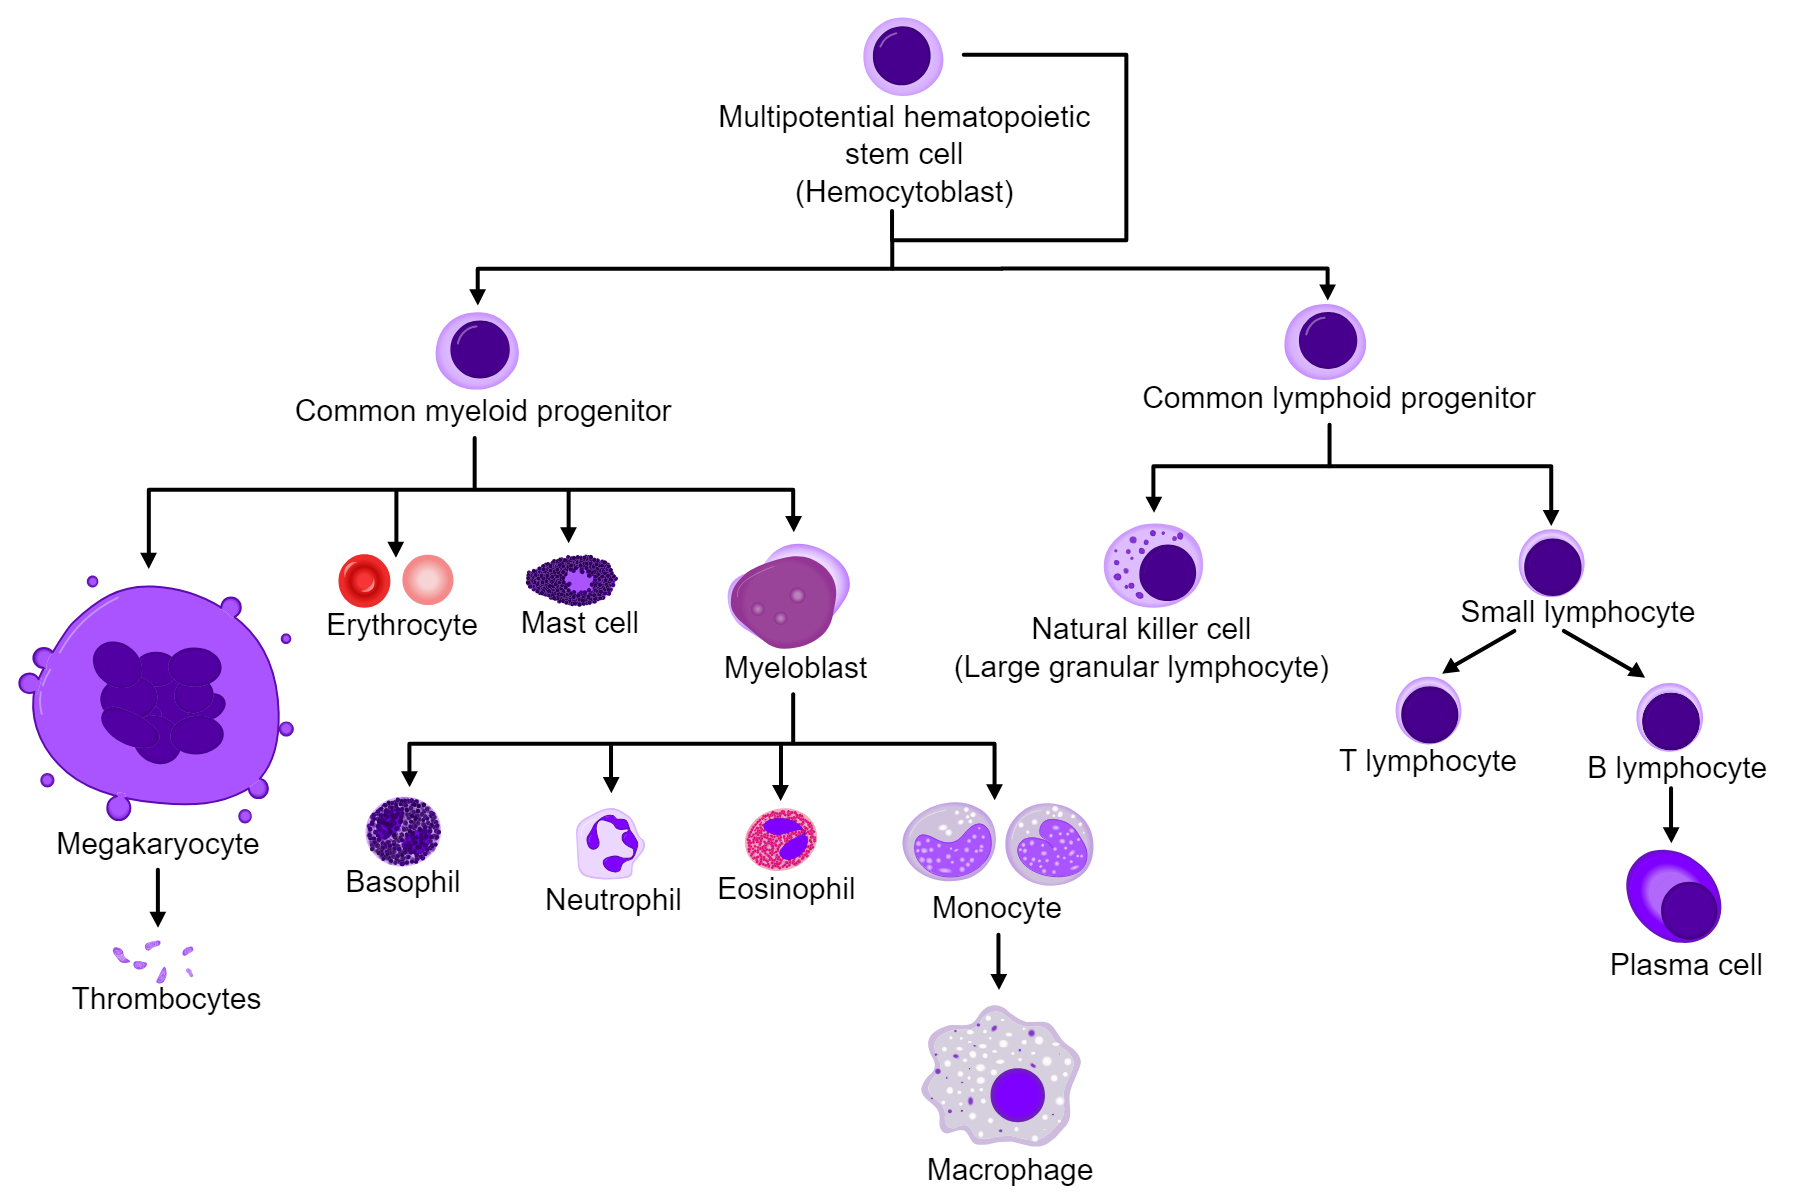

- We took an unsupervised learning method approach.
- We built a deep learning network using a backbone of Resnet50 pre trained network and trained a variational autoencoder on top of it. At the same time we added a clustering layer.
- Our implementation is an improvement of: https://arxiv.org/pdf/1511.06335.pdf. We added a Resnet50 backbone for improved autoencoder and Adadelta optimizer.
- The network integrates both an encoder and decoder, along with a k-means layer. To enhance performance, we incorporated a ResNet backbone into our implementation.

## Cell Types

- Limphocyte: looks like well rounded purple colored potato. These are the easiest to identify.
- Monocyte: The cell shape lookes roundish with skin-red color with some purple stuff inside. However the purple color is never fully covering the cell surface. Also, the purple colored portion of the cell is always in one continuous piece.
- Neutrophil: The cell shape lookes roundish with skin-red color with some purple stuff inside. However the cell contains purple colored multiple whole-groundnuts inside it. The groundnuts could be disjointed within the cell.
- Eosinophil: They look like Neutrophils. Alas! See the confusion matrix published by paultimothymooney. In his kernel, most of the failures happen when predictor falsly thinks that Eosinophils are Neutrophils.
- Mononuclear (Basophil + Lymphocyte vs Monocyte) vs Polynuclear (Neutrophil + Eosinophil).
- Basophils are a type of white blood cell (leukocyte) and are the least common of the granulocytes, representing about 0.5% to 1% of circulating white blood cells. They are part of the immune system and play various roles in both protective and pathological processes. Basophils can be identified under a microscope by their large, dark-staining granules that obscure the cell nucleus. They are typically identified in a blood smear using specific staining techniques. My plan was to use technique like over sampling (SMOTE) in order to complete my dataset, but due to lack of time, I decided to focus only on 4 types of cells. Basophils and eosinophils share the most similarities in terms of visible granules and involvement in allergic and parasitic responses, although each cell type has unique functions within the immune system.

## Distribution of Cell Types

In [7]:
import pandas as pd
import plotly.graph_objs as go


# Load the CSV file into a DataFrame
df = pd.read_csv('./data/labels.csv')

# Split entries containing multiple cell types
split_categories = df['Category'].str.split(',\\s*').explode()

# Count the occurrences of each cell type
category_counts = split_categories.value_counts()

# Create a histogram with multiple colors
histogram = go.Bar(x=category_counts.index,
                   y=category_counts.values,
                   marker=dict(color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']),
                   width=0.4  # Adjust the width of the bars
                   )

# Layout
layout = go.Layout(title='Distribution of Cell Types',
                   xaxis=dict(title='Cell Type'),
                   yaxis=dict(title='Count'),
                   width=800,  # Set the width of the plot
                   height=500,  # Set the height of the plot
                   )

# Create figure
fig = go.Figure(data=[histogram], layout=layout)

# Show plot
fig.show()

## Handling Class Imbalance Using More Data From Kaggle And Oversampling

- We found and utilized a larger set of images of white blood cells in a Kaggle archive (https://www.kaggle.com/datasets/paultimothymooney/blood-cells).
- Since it doesn't contain Basophil cell types, I decided to oversample Basophile cells.

Training samples:

- Cell: MONOCYTE         num samples: 2478
- Cell: EOSINOPHIL       num samples: 2497
- Cell: LYMPHOCYTE       num samples: 2483
- Cell: NEUTROPHIL       num samples: 2499
- Cell: BASOPHIL         num samples: 1000

Total training samples: 10957

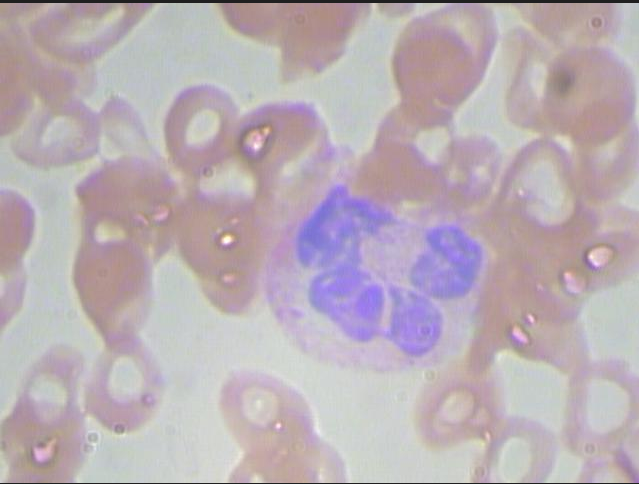

## Preprocessing
- Image Resolution: I scaled all my images to 224x224 (px).
- For my experimentation, I used 10% of training data as validation set.
- I used stratified split.
- Image Normalization: I normalized every pixel location over entire training dataset.

## Special Accuracy Function For Clustering
This acc function calculates clustering accuracy, which is a measure of how well a clustering algorithm assigns data points to clusters compared to the ground truth labels. It does so by finding the best matching between the predicted cluster assignments (y_pred) and the true labels (y_true), and then calculating the accuracy based on this matching.

Here's how the function works:

1. It first ensures that both y_true and y_pred are integer arrays.
2. It asserts that the sizes of y_true and y_pred are equal.
3. It initializes a confusion matrix w where each entry w[i, j] denotes the number of data points that belong to cluster i according to y_pred and to cluster j according to y_true.
4. It computes the optimal one-to-one matching between the predicted clusters and the true clusters using the Hungarian algorithm, implemented in linear_assignment from scikit-learn.
5. It calculates the accuracy by summing the values of the confusion matrix corresponding to the optimal matching and dividing by the total number of data points.
6. This accuracy measure is specifically tailored for clustering algorithms, where there is no inherent ordering of cluster labels. It accounts for the fact that clusters may be assigned arbitrary labels by the algorithm, and it finds the best matching between these labels and the true labels to compute accuracy.

Traditional accuracy metrics assume a one-to-one correspondence between predicted and true labels, which is not the case in clustering. Instead, the acc function finds the best matching between clusters and true labels, providing a more appropriate measure of clustering performance. We need to find the best matching between the predicted clusters and the true clusters and then evaluate the performance based on this matching. This is what the acc function does by finding the optimal matching using the Hungarian algorithm and computing the accuracy based on this matching.

## Code

In [ ]:
... removed for bravity

Assuming trainging data is in ./data/train/\<cell type subfolders\>.

## Network Architecture

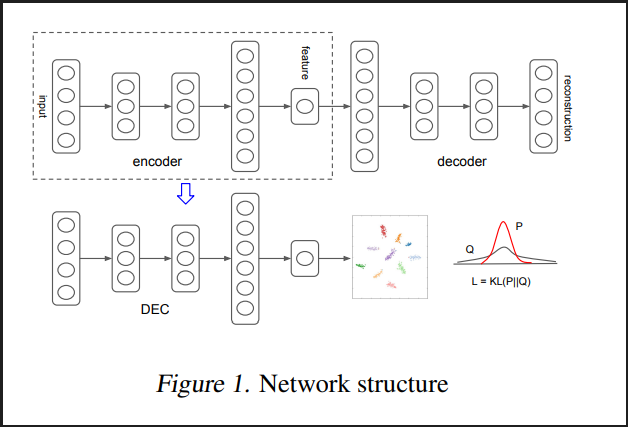

Image taken from the original paper.

## Results After 100 Epochs
In some epochs we can see a significant improvement. Only the best models are kept.

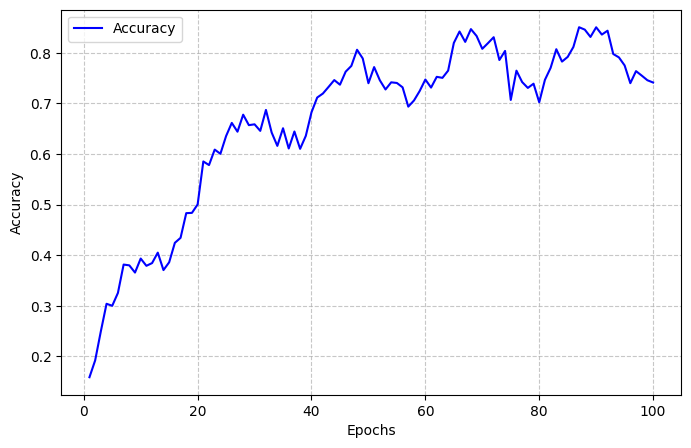

## Using The Trained Model For a New Image
Handle an unclassified new image using model.predict to find its cluster assignment.

Clustering assignment reveal a Monocyte cell type.

### References
https://www.kaggle.com/datasets/paultimothymooney/blood-cells/code

https://www.kaggle.com/code/paultimothymooney/identify-blood-cell-subtypes-from-images

https://www.kaggle.com/code/placidpanda/deep-learning-from-scratch-insights

https://www.kaggle.com/code/tanlikesmath/white-blood-cell-classification-with-fastai

https://github.com/KeremTurgutlu/self_supervised

https://www.kaggle.com/code/tathagatbanerjee/blood-cell-detection-100-acc-transfer-learning

https://www.kaggle.com/code/balakrishcodes/yolo-v5-blood-cell-detection-and-count

https://github.com/facebookresearch/deepcluster

https://github.com/facebookresearch/swav/blob/main/main_deepclusterv2.py

https://arxiv.org/pdf/1511.06335.pdf

https://github.com/szagoruyko/pytorchviz